# Audio Scene Classification for Binaural Music Ensembles DEMO


In [1]:
# import libraries and python files
import utils as u
import model as m
import numpy as np
import os

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# set hrtf directory
hrtf_home = '/content/drive/My Drive/hrtf_datasets/thesis/*.wav'
if not os.path.exists(hrtf_home):
  print('You should upload the rtf first, unzip all its folders and '
  'locate it in the data_home folder.\nFollow the instructions in the practice '
  'of our class #6.')

You should upload the rtf first, unzip all its folders and locate it in the data_home folder.
Follow the instructions in the practice of our class #6.


### 1. HRTF Preparation

In [ ]:
# load hrtf
hrtf_set = u.hrtf(hrtf_home)
hrtf_set.load()

In [ ]:
# print hrtf files
hrtf_set.print_files()

List of HRTF files:
0. e/My Drive/hrtf_datasets/thesis/00_H-30e000a.wav
1. e/My Drive/hrtf_datasets/thesis/01_H-30e030a.wav
2. e/My Drive/hrtf_datasets/thesis/02_H-30e060a.wav
3. e/My Drive/hrtf_datasets/thesis/03_H-30e090a.wav
4. e/My Drive/hrtf_datasets/thesis/04_H-30e120a.wav
5. e/My Drive/hrtf_datasets/thesis/05_H-30e150a.wav
6. e/My Drive/hrtf_datasets/thesis/06_H-30e180a.wav
7. e/My Drive/hrtf_datasets/thesis/07_H-30e210a.wav
8. e/My Drive/hrtf_datasets/thesis/08_H-30e240a.wav
9. e/My Drive/hrtf_datasets/thesis/09_H-30e270a.wav
10. e/My Drive/hrtf_datasets/thesis/10_H-30e300a.wav
11. e/My Drive/hrtf_datasets/thesis/11_H-30e330a.wav
12. e/My Drive/hrtf_datasets/thesis/12_H0e015a.wav
13. e/My Drive/hrtf_datasets/thesis/13_H0e045a.wav
14. e/My Drive/hrtf_datasets/thesis/14_H0e075a.wav
15. e/My Drive/hrtf_datasets/thesis/15_H0e105a.wav
16. e/My Drive/hrtf_datasets/thesis/16_H0e135a.wav
17. e/My Drive/hrtf_datasets/thesis/17_H0e165a.wav
18. e/My Drive/hrtf_datasets/thesis/18_H0e195a.w

In [ ]:
# play hrtf files for checking
hrtf_set.play_files()

HRTF0:


HRTF1:


HRTF2:


HRTF3:


HRTF4:


HRTF5:


HRTF6:


HRTF7:


HRTF8:


HRTF9:


HRTF10:


HRTF11:


HRTF12:


HRTF13:


HRTF14:


HRTF15:


HRTF16:


HRTF17:


HRTF18:


HRTF19:


HRTF20:


HRTF21:


HRTF22:


HRTF23:


HRTF24:


HRTF25:


HRTF26:


HRTF27:


HRTF28:


HRTF29:


HRTF30:


HRTF31:


HRTF32:


HRTF33:


HRTF34:


HRTF35:


HRTF36:


HRTF37:


In [ ]:
# print speaker arrays
hrtf_set.print_speaker_array()

Azimuth cordinates for the speaker array:
[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330.  15.  45.
  75. 105. 135. 165. 195. 225. 255. 285. 315. 345.   0.  30.  60.  90.
 120. 150. 180. 210. 240. 270. 300. 330.   0.   0.]
Dimensions for azimuth cordinates:
(38,)

Elevation cordinates for the speaker array:
[-30. -30. -30. -30. -30. -30. -30. -30. -30. -30. -30. -30.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  30.  30.  30.  30.
  30.  30.  30.  30.  30.  30.  30.  30.  90. -90.]
Dimensions for elevation cordinates:
(38,)


In [ ]:
# get hrtf data
hrtf_array, hrtf_sr, hrtf_vector = hrtf_set.get()

# check hrtf shape
print(hrtf_array.shape)
print(hrtf_sr)
print(hrtf_vector.shape)

(38, 128, 2)
44100
(38, 2)


### 2. Create vbap panner

In [ ]:
panner = u.vbap_panner(hrtf_array, hrtf_sr, hrtf_vector)

### 3. Generate Ensemble Locations

In [8]:
num_examples = 1500
center_array = np.array([0, 45, 90, 135, 180, 225, 270, 315])
width = 20
max_num_tracks = 4

# get randomized instruments' source locations
source_locations = u.random_generater(num_examples, center_array, width, max_num_tracks)
print(source_locations)

[[135   9  19   3  -3]
 [ 90 -12  -9 -20   1]
 [225  12   9  18 -15]
 ...
 [270  -3   4   6  10]
 [315 -10  -7  -5   1]
 [225   1 -13   8  10]]


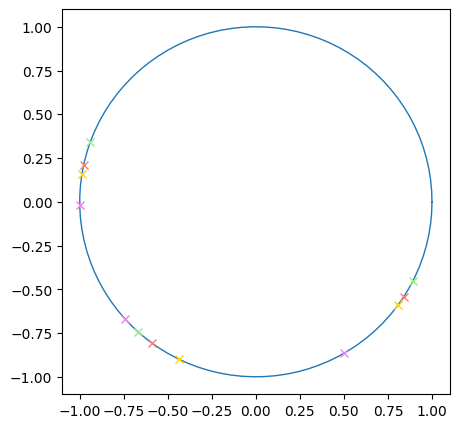

In [ ]:
# draw the first 3 examples on elevation-0 plane
u.draw_sources(source_locations[:3], size=5, colors = ['salmon', 'gold', 'lightgreen', 'violet'])

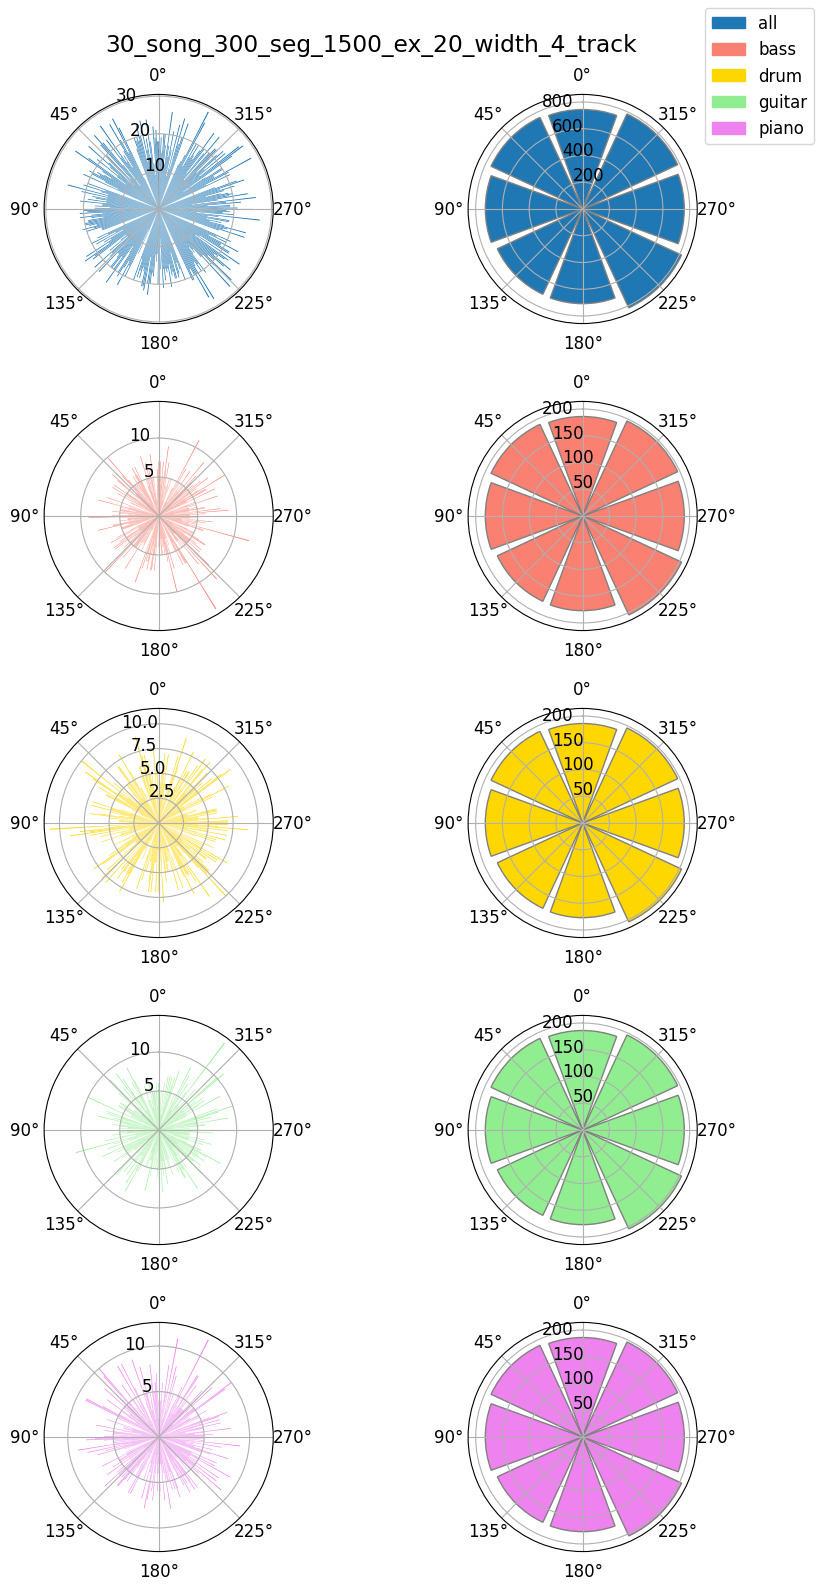

In [ ]:
u.plot_polar_distribution(source_locations, width, size=(9, 16), title='30_song_300_seg_1500_ex_20_width_4_track')

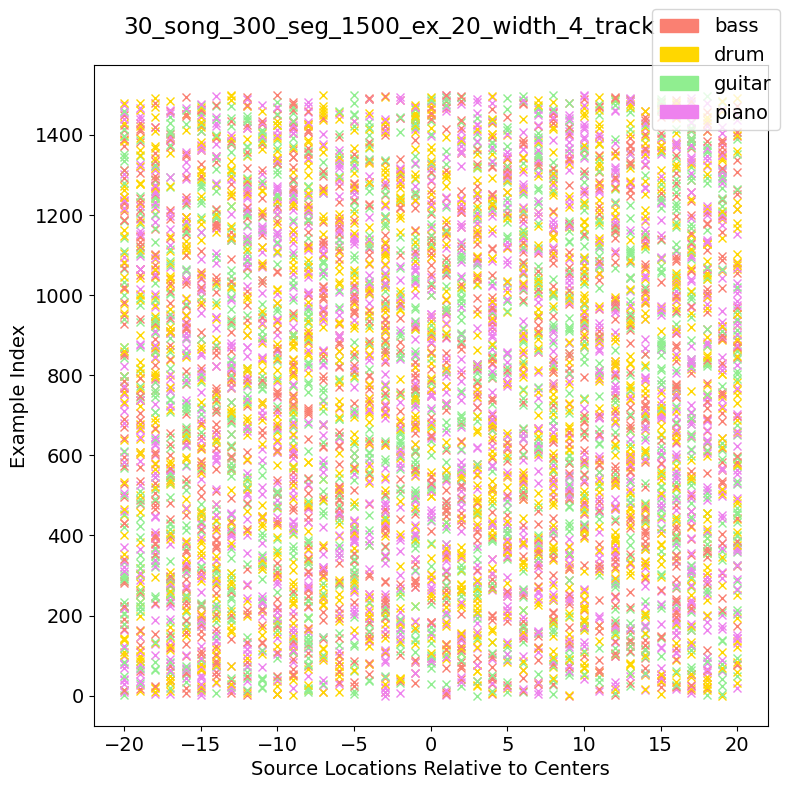

In [ ]:
u.plot_relative_distribution(source_locations, width, size=8, title='30_song_300_seg_1500_ex_20_width_4_track')

### 4. Get Multitrack Array

In [ ]:
!pip install mirdata 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=3334f1f2e9d380f7a9fa620d7bb1a00ecf5620172f1a3fd34d0660976b5b30e7
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64907 sha256=d3873f8a0af5edc5dddc3ec8330

In [ ]:
import mirdata
import librosa
import numpy as np
import random
from IPython.display import Audio
import librosa
import librosa.display

data_home = '/content/drive/My Drive/mir_datasets/slakh' 
dataset = mirdata.initialize('slakh', data_home=data_home, version='default')

In [ ]:
# get multitrack array

m_array = []

for i in range(1, 31):
  
  if i<10:
    m_id = 'Track0000' + str(i)
  else:
    m_id = 'Track000' + str(i)
  t_array = []
  m_track = dataset.multitrack(m_id)
  for i in range(4):
    t_array.append([])

  for t_id in m_track.track_ids:
    track = m_track.tracks[t_id]
    audio = track.audio

    ins_id = -1
    ins_name = track.instrument

    if ins_name == 'Bass':
      ins_id = 0
    elif ins_name == 'Drums':
      ins_id = 1
    elif ins_name == 'Guitar':
      ins_id = 2
    elif ins_name == 'Piano':
      ins_id = 3

    # print(type(audio))
    if (audio is not None) and (ins_id != -1) :
      print(t_id)
      y,sr = track.audio
      st = 10
      t_array[ins_id].append(np.array(y))
  
  m_array.append(t_array)

Track00001-S00
Track00001-S01
Track00001-S02
Track00001-S03
Track00001-S07
Track00001-S08
Track00002-S01
Track00002-S06
Track00002-S08
Track00002-S09
Track00003-S00
Track00003-S01
Track00003-S02
Track00003-S03
Track00003-S04
Track00003-S06
Track00003-S07
Track00003-S08
Track00004-S01
Track00004-S04
Track00004-S06
Track00004-S07
Track00004-S08
Track00005-S00
Track00005-S01
Track00005-S02
Track00005-S04
Track00005-S06
Track00005-S08
Track00005-S13
Track00006-S00
Track00006-S01
Track00006-S03
Track00006-S06
Track00006-S10
Track00006-S11
Track00007-S00
Track00007-S01
Track00007-S02
Track00007-S03
Track00007-S04
Track00007-S07
Track00007-S08
Track00008-S00
Track00008-S01
Track00008-S02
Track00008-S03
Track00008-S05
Track00009-S00
Track00009-S06
Track00009-S07
Track00009-S12
Track00010-S00
Track00010-S01
Track00010-S02
Track00010-S05
Track00010-S06
Track00011-S01
Track00011-S02
Track00011-S03
Track00011-S04
Track00011-S05
Track00011-S06
Track00011-S07
Track00011-S08
Track00012-S00
Track00012

In [ ]:
# Get number of tracks for each instrument
ins_count = np.zeros((len(m_array), 4))

for i in range(len(m_array)):
  for j in range(4):
    ins_count[i][j] = len(m_array[i][j])

In [ ]:
# np.save('/content/drive/My Drive/hrtf_datasets/thesis/ins_count.npy', ins_count)

In [ ]:
# ins_count = np.load('/content/drive/My Drive/hrtf_datasets/thesis/ins_count.npy')

In [ ]:
!pip install dataframe_image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import dataframe_image as dfi

bass = pd.Series(ins_count[:, 0])
drum = pd.Series(ins_count[:, 1])
guitar = pd.Series(ins_count[:, 2])
piano = pd.Series(ins_count[:, 3])

d = {'bass': bass, 'drum': drum, 'guitar': guitar, 'piano': piano}

instruments = pd.DataFrame(d)
no_drum = ins_count[:, 0] + ins_count[:, 2] + ins_count[:, 3]
print(np.mean(no_drum)/3)
print(instruments)

1.6777777777777778
    bass  drum  guitar  piano
0    1.0   1.0     3.0    1.0
1    1.0   1.0     1.0    1.0
2    1.0   1.0     5.0    1.0
3    1.0   1.0     1.0    2.0
4    1.0   1.0     3.0    2.0
5    1.0   1.0     3.0    1.0
6    1.0   1.0     2.0    3.0
7    1.0   1.0     1.0    2.0
8    1.0   1.0     1.0    1.0
9    1.0   1.0     2.0    1.0
10   1.0   1.0     5.0    1.0
11   2.0   1.0     2.0    2.0
12   2.0   1.0     1.0    1.0
13   1.0   1.0     1.0    2.0
14   1.0   1.0     1.0    1.0
15   1.0   1.0     3.0    2.0
16   0.0   1.0     3.0    1.0
17   2.0   1.0     2.0    3.0
18   1.0   1.0     2.0    2.0
19   1.0   1.0     1.0    2.0
20   0.0   1.0     2.0    2.0
21   0.0   1.0     3.0    3.0
22   1.0   1.0     2.0    1.0
23   3.0   1.0     1.0    1.0
24   1.0   1.0     2.0    2.0
25   1.0   1.0     6.0    1.0
26   1.0   1.0     2.0    2.0
27   2.0   1.0     4.0    3.0
28   0.0   1.0     2.0    2.0
29   1.0   1.0     1.0    2.0


### 5. Get Signal Array (three-second ensemble segments)

In [ ]:
# preparing signals
sig_array = u.get_sig_array(source_array= m_array, size=300)
sig_sr = 16000

print(sig_array.shape)
print(sig_sr)

(300, 4, 48000)
16000


In [ ]:
print(sig_array[0][0])

[-9.15527344e-05 -9.15527344e-05 -9.15527344e-05 ... -1.30584717e-01
 -1.30737305e-01 -1.30859375e-01]


### 6. Final Dataset Generation (binaural ensemble segments)



In [ ]:
# pan one example for testing
panner.spatialize( sig_array[0][0], sig_sr, 45, 0)

Indexes of speaker array used:[13 25 12]


array([[-1.81603630e-06, -3.70619654e-08],
       [-1.60928014e-08, -7.14268887e-08],
       [-1.58752092e-06, -9.83229328e-08],
       ...,
       [-5.82708784e-03,  9.23620273e-05],
       [-3.22474534e-03,  6.43259986e-05],
       [-1.15605612e-03,  4.59795046e-05]])

In [ ]:
sig_array[0][0].shape

(48000,)

In [ ]:
dataset = u.generate_data(source_locations, sig_array, sig_sr, panner, size=1500)

print(dataset.shape)

Streaming output truncated to the last 5000 lines.
Indexes of speaker array used:[19  7 18]
1083:
Azimuth: 183, Elevation: 0
Indexes of speaker array used:[17  6 18]
1083:
Azimuth: 168, Elevation: 0
Indexes of speaker array used:[17  6 18]
1084:
Azimuth: 238, Elevation: 0
Indexes of speaker array used:[20 19 32]
1084:
Azimuth: 224, Elevation: 0
Indexes of speaker array used:[19  7 18]
1084:
Azimuth: 218, Elevation: 0
Indexes of speaker array used:[19  7 18]
1084:
Azimuth: 213, Elevation: 0
Indexes of speaker array used:[19  7 18]
1085:
Azimuth: 241, Elevation: 0
Indexes of speaker array used:[20 19 32]
1085:
Azimuth: 236, Elevation: 0
Indexes of speaker array used:[20 19 32]
1085:
Azimuth: 208, Elevation: 0
Indexes of speaker array used:[19  7 18]
1085:
Azimuth: 229, Elevation: 0
Indexes of speaker array used:[20 19 32]
1086:
Azimuth: 281, Elevation: 0
Indexes of speaker array used:[20 33 21]
1086:
Azimuth: 288, Elevation: 0
Indexes of speaker array used:[22 10 21]
1086:
Azimuth: 263, 

In [5]:
print(dataset.shape)

(1500, 128, 259, 2)


In [ ]:
# # save dataset
# np.save('/content/drive/My Drive/hrtf_datasets/thesis/30_song_300_seg_1500_exa_5_width_4_track.npy', dataset)

In [ ]:
# # load dataset
# dataset_5 = np.load('/content/drive/My Drive/hrtf_datasets/thesis/30_song_300_seg_1500_exa_5_width_4_track.npy')
# dataset_10 = np.load('/content/drive/My Drive/hrtf_datasets/thesis/30_song_300_seg_1500_exa_10_width_4_track.npy')
# dataset_20 = np.load('/content/drive/My Drive/hrtf_datasets/thesis/30_song_300_seg_1500_exa_20_width_4_track.npy')
# dataset_30 = np.load('/content/drive/My Drive/hrtf_datasets/thesis/30_song_300_seg_1500_exa_30_width_4_track.npy')
# dataset_40 = np.load('/content/drive/My Drive/hrtf_datasets/thesis/30_song_300_seg_1500_exa_40_width_4_track.npy')

In [4]:
dataset = np.load('/content/drive/My Drive/hrtf_datasets/thesis/30_song_300_seg_1500_exa_20_width_4_track.npy')

### 7. CNN Model Design: 3 conv unit - 3 dense unit


In [19]:
# Build the model
num_classes = 8
input_shape = (128,259,2)

model = m.build_model(input_shape=input_shape, num_classes=num_classes)

In [20]:
# train, validation, test split
train_size = 1000
val_size = 300

features_train, features_val, features_test = m.dataset_split(dataset=dataset,
                                                              train_size=train_size,
                                                              val_size=val_size)

labels_train, labels_val, labels_test = m.label_split(source_locations=source_locations, 
                                                      train_size=train_size,
                                                      val_size=val_size)


In [21]:
print(features_train.shape)

(1000, 128, 259, 2)


In [22]:
import keras
# Train the model for a specified number of epochs
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="baseline.keras",
        save_best_only=True,
        monitor="val_loss")
]
num_epochs = 60
batch_size = 16

history = model.fit(features_train, labels_train, epochs=num_epochs,  batch_size=batch_size, validation_data=(features_val, labels_val))

Epoch 1/60
63/63 [==============================] - 11s 161ms/step - loss: 2.4375 - accuracy: 0.1670 - val_loss: 2.1647 - val_accuracy: 0.1900
Epoch 2/60
63/63 [==============================] - 10s 153ms/step - loss: 1.8842 - accuracy: 0.3080 - val_loss: 1.8202 - val_accuracy: 0.2667
Epoch 3/60
63/63 [==============================] - 8s 132ms/step - loss: 1.5827 - accuracy: 0.4010 - val_loss: 1.6814 - val_accuracy: 0.3800
Epoch 4/60
63/63 [==============================] - 10s 156ms/step - loss: 1.4426 - accuracy: 0.4400 - val_loss: 1.6043 - val_accuracy: 0.3633
Epoch 5/60
63/63 [==============================] - 9s 138ms/step - loss: 1.3124 - accuracy: 0.4850 - val_loss: 1.4762 - val_accuracy: 0.4233
Epoch 6/60
63/63 [==============================] - 9s 141ms/step - loss: 1.1845 - accuracy: 0.5190 - val_loss: 1.4278 - val_accuracy: 0.4133
Epoch 7/60
63/63 [==============================] - 10s 157ms/step - loss: 1.1665 - accuracy: 0.5240 - val_loss: 1.3967 - val_accuracy: 0.4400
Ep

### 8. Result Analysis: loss, confusion matrix, errer plot

In [11]:
title = '30_song_300_seg_1500_ex_20_width_4_track'

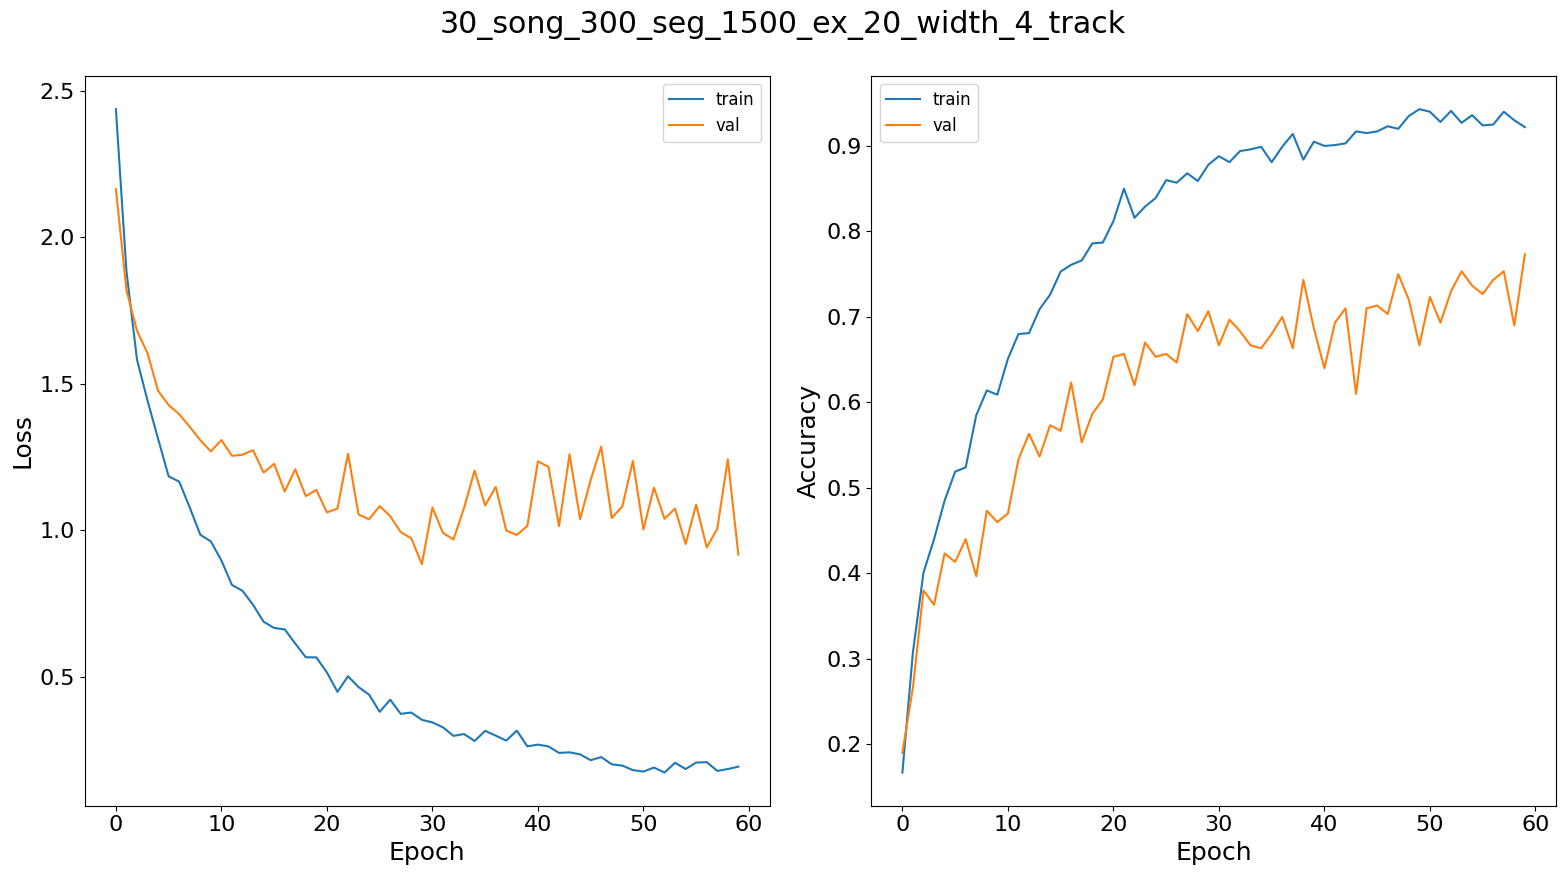

In [23]:
m.plot_loss(history, title=title, figsize=(16, 9))

In [24]:
# pridiction analysis
predictions = model.predict(features_test)
print(predictions[0])

print(labels_test[0])

print(labels_val.shape)

7/7 [==============================] - 1s 66ms/step
[2.3875682e-05 9.9862140e-01 1.3253026e-03 7.0470919e-06 2.6071280e-08
 8.8963368e-08 4.2176991e-09 2.2077185e-05]
1.0
(300,)


In [25]:
# print test loss and accuracy
test_loss, test_acc = model.evaluate(features_test, labels_test)
print(f"test_acc: {test_acc}")

7/7 [==============================] - 1s 102ms/step - loss: 0.7827 - accuracy: 0.7500
test_acc: 0.75


In [26]:
# get true and prediction labels
y_true = labels_test
y_pred = []
for i in range(len(predictions)):
    y_pred.append(np.argmax(predictions[i]))

y_pred = np.array(y_pred)
print(y_true.size)
print(y_pred.size)

200
200


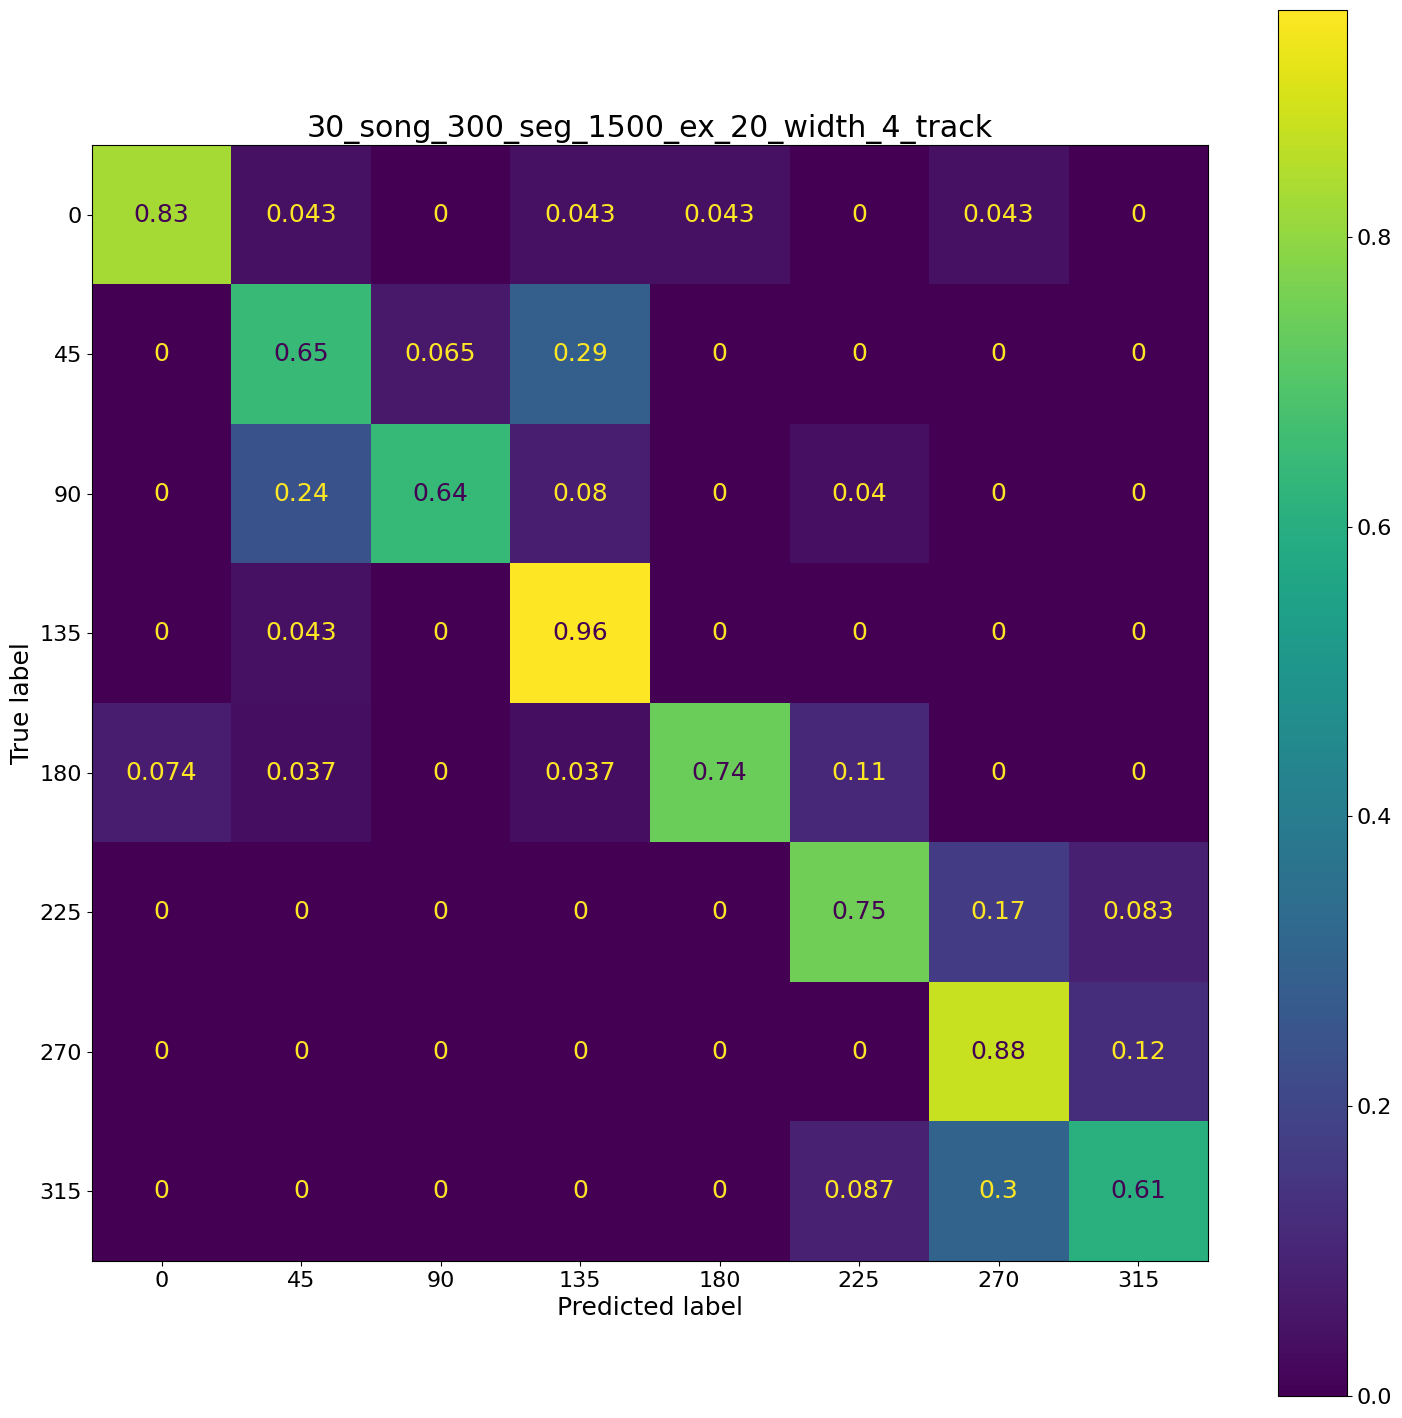

<Figure size 640x480 with 0 Axes>

In [27]:
m.plot_confusion_matrix(y_true=y_true, y_pred=y_pred, normalize = 'true',
                        title=title)

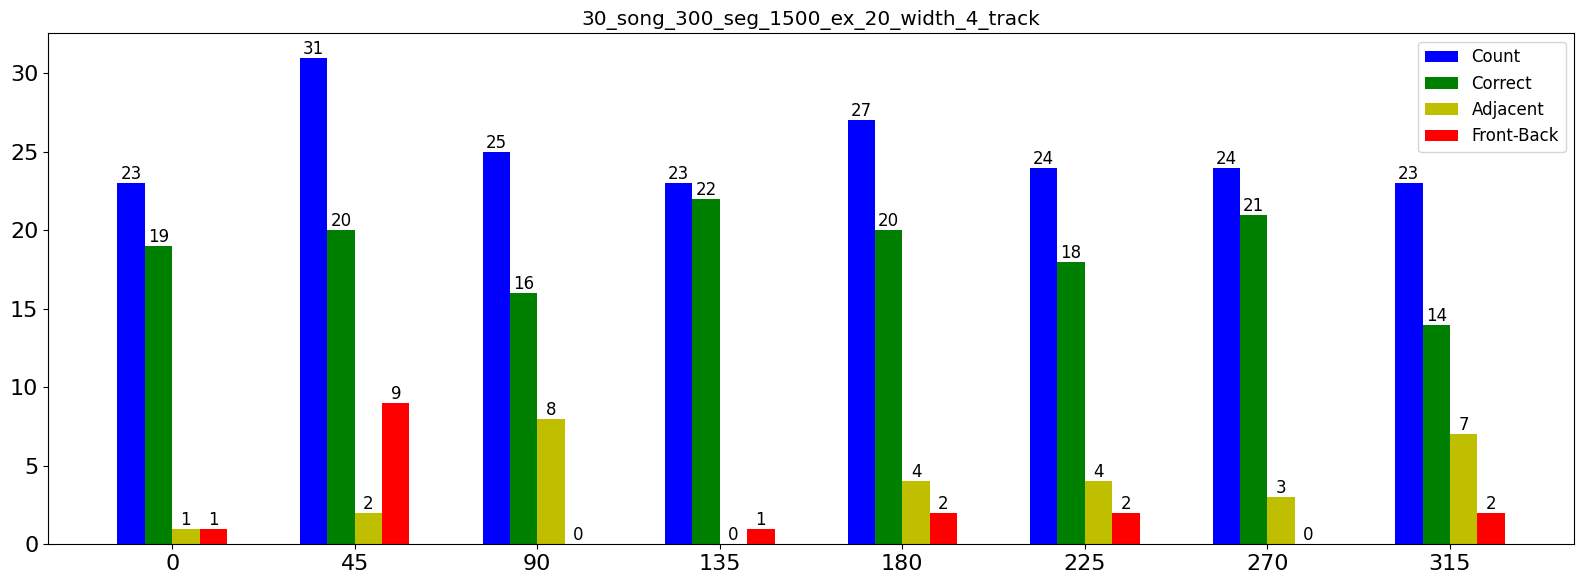

array([[23., 19.,  1.,  1.],
       [31., 20.,  2.,  9.],
       [25., 16.,  8.,  0.],
       [23., 22.,  0.,  1.],
       [27., 20.,  4.,  2.],
       [24., 18.,  4.,  2.],
       [24., 21.,  3.,  0.],
       [23., 14.,  7.,  2.]])

In [28]:
m.plot_prediction_analysis(y_pred, y_true.astype(int), title=title)

### Sketch Papers

In [ ]:
print(y_pred)

[1 6 5 6 5 2 6 4 5 3 4 1 3 3 7 5 6 2 4 7 2 4 3 3 3 4 5 5 1 1 2 1 3 6 5 3 6
 3 2 4 7 4 3 5 7 7 7 6 5 4 3 7 2 0 4 3 7 4 3 1 3 3 4 0 5 3 3 3 3 1 7 6 4 1
 2 5 1 4 1 1 1 3 3 0 1 6 7 7 4 3 0 3 4 6 2 0 0 7 5 5 2 0 3 7 0 7 7 3 7 7 3
 0 5 3 3 2 7 6 3 6 5 1 3 4 3 0 6 3 7 3 3 7 4 7 3 5 4 1 2 0 3 4 2 5 2 4 3 3
 5 3 1 3 7 3 7 3 0 4 0 0 4 0 4 7 0 4 5 4 4 0 6 4 4 1 4 3 7 4 3 3 3 2 2 5 3
 2 1 1 0 6 1 5 4 1 6 5 6 6 6 5]


In [ ]:
print(y_true)

[1. 6. 5. 6. 4. 1. 7. 4. 5. 3. 4. 1. 3. 1. 7. 5. 6. 2. 4. 5. 2. 4. 3. 3.
 3. 4. 5. 5. 1. 1. 2. 1. 3. 7. 5. 1. 5. 2. 2. 0. 7. 4. 2. 5. 7. 6. 6. 6.
 4. 4. 4. 6. 2. 0. 0. 2. 6. 0. 3. 2. 3. 5. 4. 0. 5. 3. 1. 2. 3. 1. 7. 6.
 4. 2. 1. 5. 2. 4. 2. 1. 1. 2. 1. 0. 1. 6. 7. 7. 4. 2. 0. 1. 4. 6. 2. 0.
 0. 5. 5. 5. 1. 0. 3. 6. 0. 7. 5. 3. 7. 7. 3. 0. 5. 3. 3. 2. 6. 6. 1. 6.
 5. 1. 3. 4. 1. 0. 6. 0. 5. 3. 3. 7. 4. 6. 3. 6. 4. 1. 2. 7. 1. 4. 2. 7.
 2. 4. 2. 3. 5. 4. 1. 1. 7. 1. 7. 3. 6. 0. 0. 0. 7. 0. 0. 7. 0. 0. 5. 4.
 4. 7. 7. 4. 4. 2. 4. 1. 6. 0. 1. 3. 3. 1. 2. 6. 2. 2. 1. 4. 0. 7. 1. 5.
 7. 1. 6. 5. 6. 6. 7. 5.]


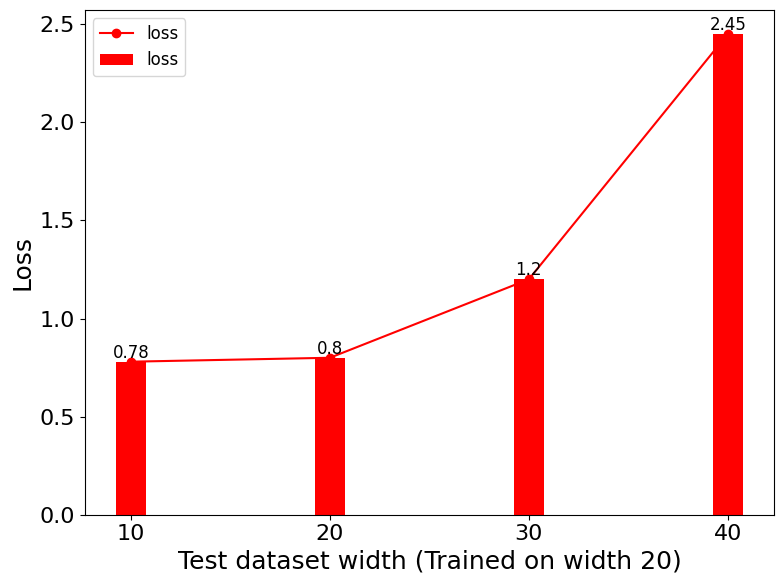

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

plt.rc('figure', labelsize=16)

# num_centers, 4 (all, correct, front back, adjacent)
count = np.zeros((5, 2))

count[:, 0] = [1.04, 0.82]
count[:, 1] = [0.67, 0.75]

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
labels = ['loss', 'accuracy']
colors = ['r', 'g']
width=0.15

x_axis = ['10','20','30', '40']

x = np.arange(4)
for i in [0]:
    bar = plt.bar(x + (i)*width, count[:, i], color=colors[i],
            width=width, label=labels[i])
    plt.bar_label(bar)
    plt.plot(x + (0)*width, count[:, i], color=colors[i],
             label=labels[i], marker='o')
plt.rc('legend', fontsize=12)
plt.legend()
plt.xticks(x, x_axis)
plt.xlabel('Test dataset width (Trained on width 20)')
plt.ylabel('Loss')
plt.title('')
plt.tight_layout()
plt.show()

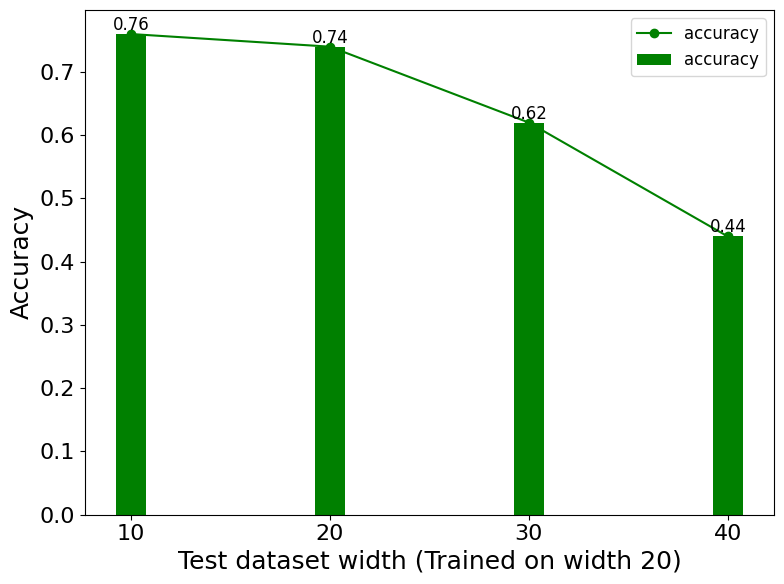

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

plt.rc('figure', labelsize=16)

# num_centers, 4 (all, correct, front back, adjacent)
count = np.zeros((4, 2))

count[:, 0] = [0.78, 0.80, 1.20, 2.45]
count[:, 1] = [0.76, 0.74, 0.62, 0.44]

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
labels = ['loss', 'accuracy']
colors = ['r', 'g']
width=0.15

x_axis = ['10','20','30', '40']

x = np.arange(4)
for i in [1]:
    bar = plt.bar(x + (0)*width, count[:, i], color=colors[i],
            width=width, label=labels[i])
    plt.bar_label(bar)
    plt.plot(x + (0)*width, count[:, i], color=colors[i],
             label=labels[i], marker='o')
plt.rc('legend', fontsize=12)
plt.legend()
plt.xticks(x, x_axis)
plt.xlabel('Test dataset width (Trained on width 20)')
plt.ylabel('Accuracy')
plt.title('')
plt.tight_layout()
plt.show()